In [1]:
import numpy as np
import pandas as pd

from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [19]:

X = np.zeros((x_train.shape[0], 784))

In [20]:
print (x_train.shape)

(60000, 28, 28)


In [21]:
for i in range(x_train.shape[0]):
    X[i] = x_train[i].flatten()

In [22]:
X = pd.DataFrame(X)

In [23]:
X.shape

(60000, 784)

In [24]:
Y = pd.DataFrame(y_train)

In [25]:
Y.head()

,0
0,5
1,0
2,4
3,1
4,9


In [26]:
X = X.sample(frac=0.1, random_state=10).reset_index(drop=True)
Y = Y.sample(frac=0.1, random_state=10).reset_index(drop=True)

In [27]:
print ("X.shape=", X.shape)
print ("Y.shape=", Y.shape)
df = X
df['label'] = Y

X.shape= (6000, 784)
Y.shape= (6000, 1)


# t-**SNE**

In [28]:
import time

from sklearn.manifold import TSNE

#n_sne = 7000

time_start = time.time()
tsne = TSNE(n_iter=300)
tsne_results = tsne.fit_transform(df.values)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 79.191890001297 seconds


# **Visulization**

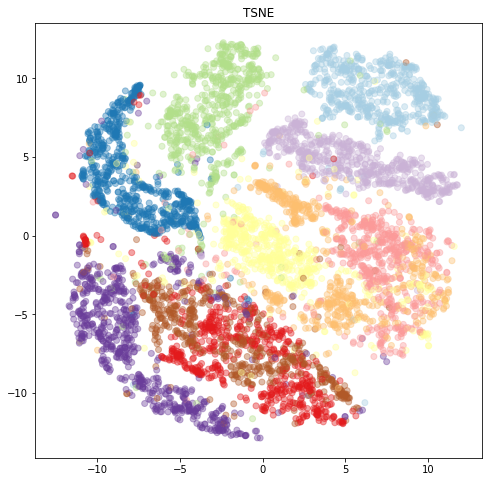

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
# Create the figure
fig = plt.figure( figsize=(8,8) )
ax = fig.add_subplot(1, 1, 1, title='TSNE' )
# Create the scatter
ax.scatter(
    x=tsne_results[:,0], 
    y=tsne_results[:,1], 
    c=df['label'], 
    cmap=plt.cm.get_cmap('Paired'), 
    alpha=0.4)
plt.show()